In [1]:
import numpy as np
import random
from math import exp
from math import log
import matplotlib.pyplot as plt

In [3]:
dataset_name = 'MovieLens100k'
dataset = np.load('preprocess/' + dataset_name+'/'+ dataset_name+'Partitioned.npy')
[user_train,user_validation,user_test, usernum,itemnum] = dataset

In [53]:
train_num = 0
for items in list(user_train.values()):
    train_num += len(items)

In [55]:
# 学習用データ数
train_num

98662

In [51]:
test_num = 0
for items in list(user_test.values()):
    test_num += len(items)

In [52]:
# テスト用データ数
test_num

1342

In [10]:
item_successor = [[] for it in range(itemnum)]
for user in user_train:
    for i in range(len(user_train[user])-1):
        pre = user_train[user][i]
        suc = user_train[user][i+1]
        item_successor[pre].append(suc)

In [12]:
num_relation = sum([len(item_successor[item]) for item in range(itemnum)])

In [13]:
def sigmoid(x):
    return 1.0 / (1 + exp(-x))

def findUser():
    while 1:
        user = random.randint(0,usernum-1)
        if len(user_train[user]) > 1:
            return user

def findNegSucc(pos_item):
    while 1:
        neg_item = random.randint(0,itemnum-1)
        if neg_item != pos_item:
            return neg_item

def TransPredict(user, pre, cur):
    return - beta[cur] - np.sum(np.square(H[pre,:] + r + R[user,:] - H[cur,:]))

In [14]:
def AUC():
    auc_train = 0
    auc_valid = 0
    auc_test = 0
    testnum = 0     # event num per user in AUC testing
    # max_itemid = max(item_train.keys())
    for user in user_test:
        if len(user_train[user])<2 or len(user_test[user])==0:
            continue
        testnum += 1

        train_pre_item = user_train[user][-2]
        train_item = user_train[user][-1]
        train_score = TransPredict(user, train_pre_item, train_item)          
        
        valid_pre_item = user_validation[user][0]
        valid_item = user_validation[user][1]
        valid_score = TransPredict(user, valid_pre_item, valid_item)
        
        test_pre_item = user_test[user][0]
        test_item = user_test[user][1]
        test_score = TransPredict(user, test_pre_item, test_item)
        
        
        count_train, count_valid, count_test = 0, 0, 0
        neg_num = 0
        for ind in range(100):
            itemid = random.randint(0,itemnum-1)
            if itemid not in user_train[user] and itemid not in user_test[user]:
                neg_num += 1
                
                neg_score = TransPredict(user, train_pre_item, itemid)
                if neg_score < train_score:
                    count_train += 1
                elif neg_score == valid_score:
                    count_train += 0.5
                else:
                    count_train += 0                
                
                neg_score = TransPredict(user, valid_pre_item, itemid)
                if neg_score < valid_score:
                    count_valid += 1
                elif neg_score == valid_score:
                    count_valid += 0.5
                else:
                    count_valid += 0
                
                neg_score = TransPredict(user, test_pre_item, itemid)
                if neg_score < test_score:
                    count_test += 1
                elif neg_score == test_score:
                    count_test += 0.5
                else:
                    count_test += 0
        
        auc_train += count_train*1.0 / neg_num
        auc_valid += count_valid*1.0 / neg_num
        auc_test += count_test*1.0 / neg_num
    
    auc_train = auc_train/testnum
    auc_valid = auc_valid/testnum
    auc_test = auc_test/testnum
    print("training AUC: ", auc_train)
    print("validation AUC: ", auc_valid)
    print("testing AUC: ", auc_test)
    return auc_train, auc_valid, auc_test


In [15]:
def normalization(it):
    dist = np.sqrt(np.sum(np.square(H[it,:])))
    if dist > 1:
        H[it,:] = H[it,:] / dist


In [16]:
lam = 0.05
bias_lam = 0.01
reg_lam = 0.1
K = 10
learn_rate = 0.05
max_iter = 500
r = np.zeros(K)
R = np.random.rand(usernum, K)/1 - 0.5
H = np.random.rand(itemnum, K)/1 - 0.5
beta = np.zeros(itemnum)

In [17]:
auc_rec_train = []
auc_rec_valid = []
auc_rec_test = []


iteration: 5	-23420.480578273382	-23098.647321446766
iteration: 10	-21432.06897929221	-21113.00895312147
training AUC:  0.9009506336453166
validation AUC:  0.8486460634182902
testing AUC:  0.8189120890643662
iteration: 15	-20408.201925691978	-20084.208360450142
iteration: 20	-19305.823974611132	-18974.301200817787
training AUC:  0.9182986476251543
validation AUC:  0.8591425383381809
testing AUC:  0.8254075519193913
iteration: 25	-18687.407434472098	-18349.4454091754
iteration: 30	-18336.453701792816	-17994.067506041472
training AUC:  0.9259540157152952
validation AUC:  0.8714382583245499
testing AUC:  0.8324285138823014
iteration: 35	-18028.932475944002	-17683.23742611426
iteration: 40	-17856.07669652977	-17507.625028584578
training AUC:  0.9305144535572473
validation AUC:  0.8735904262542393
testing AUC:  0.836199868996012
iteration: 45	-17836.043921005294	-17486.24920228755
iteration: 50	-17642.13516692907	-17289.946813434864
training AUC:  0.9272437749671598
validation AUC:  0.87393

iteration: 400	-16906.372392180438	-16521.959679104977
training AUC:  0.9355585280564233
validation AUC:  0.8762316816681848
testing AUC:  0.8406140740355056
iteration: 405	-16802.34724276436	-16418.281424076013
iteration: 410	-16798.248688815074	-16414.28177285972
training AUC:  0.9296625532556001
validation AUC:  0.8736763623606923
testing AUC:  0.8416203265384772
iteration: 415	-16921.58287306021	-16537.040524253483
iteration: 420	-16935.280061265286	-16550.59040060258
training AUC:  0.9333481086597633
validation AUC:  0.8772779001820372
testing AUC:  0.8396011223175218
iteration: 425	-16723.53629855605	-16339.262119890089
iteration: 430	-16859.51740805567	-16475.713533238482
training AUC:  0.9319317178606794
validation AUC:  0.8757614261421834
testing AUC:  0.8389846737818393
iteration: 435	-17049.79124788994	-16665.365162887592
iteration: 440	-16944.34318629086	-16559.63752120941
training AUC:  0.9304332104637804
validation AUC:  0.8762620445877718
testing AUC:  0.8381925130085961

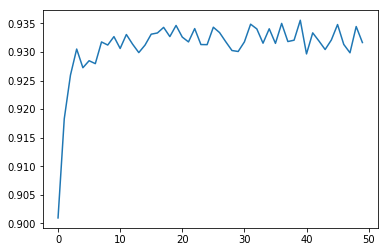

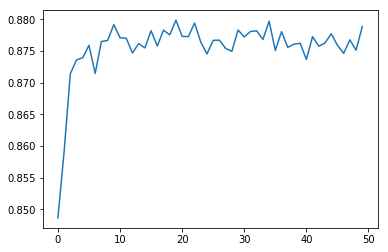

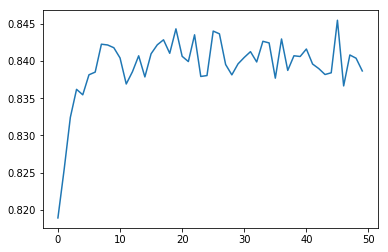

In [18]:
for it in range(max_iter):
    objective = 0
    regularization = 0
#    dg = np.zeros((itemnum, K))
#    de = np.zeros((K, itemnum))
    
    for ind in range(num_relation):
        u = findUser()
        position = random.randint(0,len(user_train[u])-2)
        p = user_train[u][position]        # previous item
        i = user_train[u][position + 1]    # positive item
        j = findNegSucc(i)                 # negative item
        
        d1 = H[p,:] + r + R[u,:] - H[i,:]
        d2 = H[p,:] + r + R[u,:] - H[j,:]
        
        z = sigmoid(-beta[i] + beta[j] - \
                    np.sum(np.square(d1)) + \
                    np.sum(np.square(d2)))
#        dg[u,:] += (1-z)*(eta[:,i]-eta[:,j])
#        de[:,i] += (1-z)*(gam[u,:])
#        de[:,j] += (1-z)*(-gam[u,:])
        beta[i] += learn_rate*(-(1-z) - 2*bias_lam*beta[i])
        beta[j] += learn_rate*((1-z) - 2*bias_lam*beta[j])
        H[p,:] += learn_rate*((1-z)*2*(d2-d1) - 2*lam*H[p,:])
        H[i,:] += learn_rate*((1-z)*2*(d1) - 2*lam*H[i,:])
        H[j,:] += learn_rate*((1-z)*2*(-d2) - 2*lam*H[j,:])
        r += learn_rate*((1-z)*2*(d2-d1) - 2*lam*r)
        R[u] = learn_rate*((1-z)*2*(d2-d1) - 2*reg_lam*R[u])
        
        normalization(p)
        normalization(i)
        normalization(j)
        
        objective += log(z)
    
#    dg -= lam*gam
#    de -= lam*eta
#    gam += learn_rate*dg
#    eta += learn_rate*de 
    
    regularization = objective - lam*np.sum(np.square(H)) - \
                                 lam*np.sum(np.square(r)) - \
                                 reg_lam*np.sum(np.square(R)) - \
                                 bias_lam*np.sum(np.square(beta))
                                                 
    if (it+1)%5 == 0:
        print('iteration: ' + str(it+1) + '\t' + str(regularization) \
                                 + '\t' + str(objective))
    if (it+1)%10 == 0:
        auc = AUC()
        auc_rec_train.append(auc[0])
        auc_rec_valid.append(auc[1])
        auc_rec_test.append(auc[2])

plt.figure()
plt.plot(auc_rec_train)
plt.figure()
plt.plot(auc_rec_valid)
plt.figure()
plt.plot(auc_rec_test)

np.save("analysis_vector/itemVector.npy",H)
np.save("analysis_vector/userVector.npy",R)

R = np.load("analysis_vector/userVector.npy")

for idx in range(20):
    i = random.randint(0,usernum-1)
    j = random.randint(0,usernum-1)
    a = R[i]
    b = R[j]
    cos_angle = a.dot(b) / np.sqrt(a.dot(a) * b.dot(b))
    print(cos_angle)

In [72]:
# 学習によって求めたベクトルを保存
np.save("analysis_vector/itemVector.npy",H)
np.save("analysis_vector/userVector.npy",R)
np.save("analysis_vector/userGrobalVector.npy",r)
np.save("analysis_vector/beta.npy",beta)

In [61]:
# 評価値を出力
np.save("auc/auc_rec_train.npy",auc_rec_train)
np.save("auc/auc_rec_valid.npy",auc_rec_valid)
np.save("auc/auc_rec_test.npy",auc_rec_test)

In [62]:
# テストACU
np.max(auc_rec_test)

0.8454882810082588